

```
Practica 8: Transformada de fourier de tiempo corto-espectrogramas. 
Laboratorio: Procesamiento Digital de señales
Harold Adrián Gómez Gil
```

In [12]:
from scipy.io.wavfile import read
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np

In [15]:
def extraer_ventanas(signal, size, fs):
    #Tamano de paso
    step=int(0.010*fs)

    n_seg = int((len(signal)-size)/step)

    # extraer segmentos
    windows = [signal[i*step:i*step+size]
                for i in range(n_seg)]

    # stack (cada fila es una ventana)
    return np.vstack(windows)

In [45]:
def potspec(X, size, n_padded_min=0):
    # Zero padding para la proxima potencia de 2
    if n_padded_min==0:
        n_padded = max(n_padded_min, int(2**np.ceil(np.log(size)/np.log(2))))
    else:
        n_padded = n_padded_min
        
    # Transformada de Fourier
    Y = np.fft.fft(X, n=n_padded)
    Y = np.absolute(Y)
    # non-redundant part
    m = int(n_padded/2) + 1
    Y = Y[:, :m]
    return np.abs(Y)**2, n_padded

<h1>1.Introducción</h1>

<h2>1.2 Carga y visualización de la señal</h2>

La frecuencia de muestreo es 16000


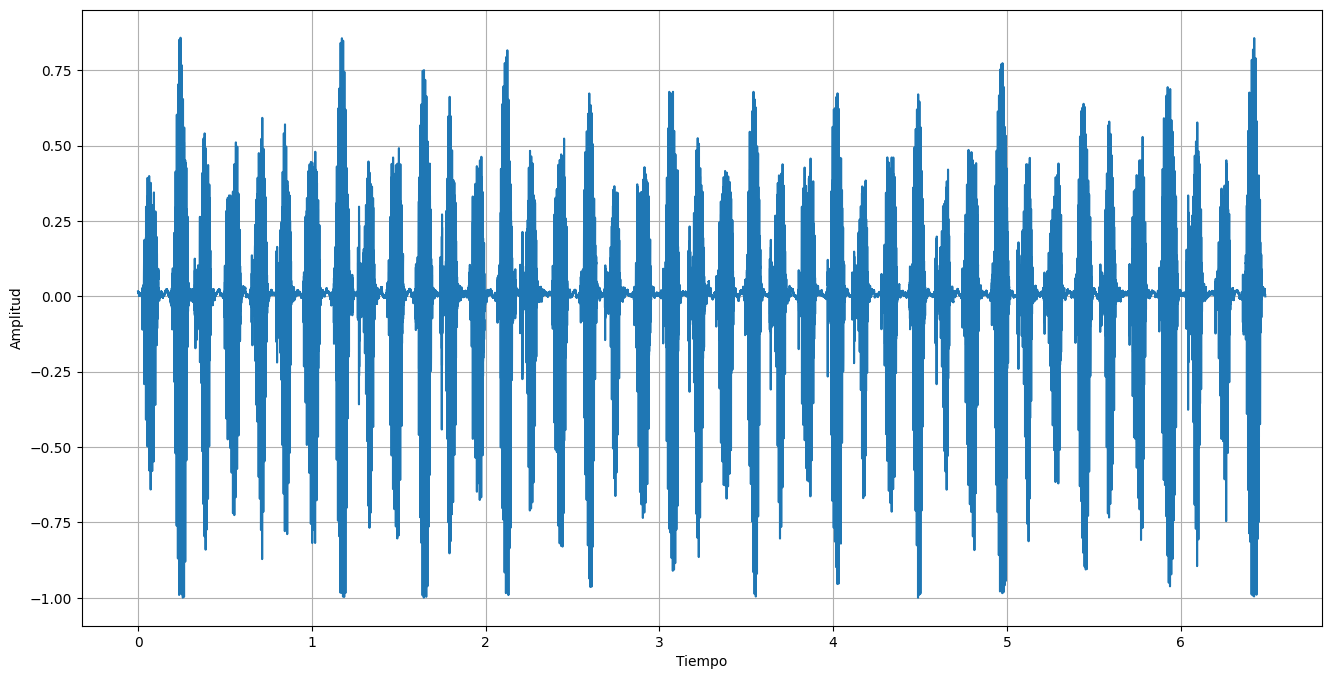

In [14]:
file_audio=("senal1.wav")
fs,x=read(file_audio)
print(f'La frecuencia de muestreo es {fs}')
x = x/float(max(abs(x))) 
t =  np.arange(0,float(len(x))/fs,1.0/fs)
plt.figure(figsize =(16,8))
plt.plot(t,x)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()
Audio(x,rate =fs)


<p>Del audio se puede extraer que se tiene una frecuencia de muestreo de 16khz, además que se trata de un comportamiento periodico, en el audio, según lo que se va pronunciando</p>

<h2>1.3 Extracción de segmentos</h2>

<p>Segmentación  con tamaño de ventana de 20ms</p>

In [50]:
ventanas=extraer_ventanas(x,int(0.04*fs),fs)
ventanas.shape #(644,640) --> Donde se tiene 644 filas y 640 columnas. 

(644, 640)

<h2>1.4 Aplicación de ventanas</h2>

<h3>1.4.1</h3>
<p>La ventana Hamming se define como: w[n]=0.54−0.46cos( 
2πn/N-1); en donde w(n) es el valor de la ventana de muestra n y N es el numero total de muestras en la ventana (la longitud de la ventana), para construirla se debe elegir un N que sea entero y positivo. Cuanto más grande sea el N, más estrecha será la ventana en el dominio del tiempo, pero se comportará mejor en la frecuencia. Cuando el N es muy pequeño, en el dominio de la frecuencia se presenta un efecto de Aliasing en donde se traslapan las señales. </p>
<p>Se puede aplicar usando la libreria np.hamming()</p>

<h3>1.4.2</h3>

In [30]:
Hamming=np.hamming(int(0.04*fs))

aplicacion_hamming =  np.array([ventana*Hamming for ventana in ventanas])
aplicacion_hamming.shape

(644, 640)

<h3>1.4.3</h3>

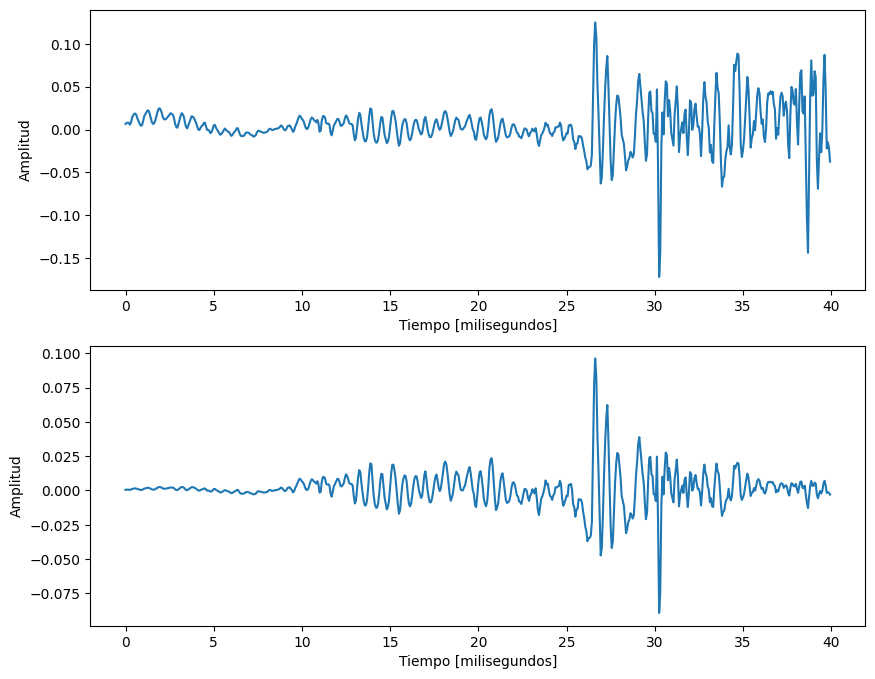

In [44]:
t =  np.arange(0, 40 , 40/(0.04*fs))
plt.figure(figsize =(10,8))
plt.subplot(211)
plt.plot(t, ventanas[30])
plt.xlabel("Tiempo [milisegundos]")
plt.ylabel("Amplitud")
plt.subplot(212)
plt.plot(t , aplicacion_hamming[30])
plt.xlabel("Tiempo [milisegundos]")
plt.ylabel("Amplitud")
plt.show()

<p>Con fines de observar mejor el comportamiento de las señales, se toma un N del doble de lo que propone la guia, en este caso 40ms, en donde se obtiene lo siguiente
<li>Al apicar la ventana de Hamming se observa que en los extremos del fragmento de la señal se atenua la señal, buscando que esta atenuación tienda a convertirse en cero en los extremos.|</li>
<li>Mientras más se acerque la ventana al centro de la señal, más parecido será lo obtenido con lo original</li>
</p>

<h2>1.5 Aplicación de la STFT<h2>

<h3>1.5.1. </h3>

In [52]:
potspec(aplicacion_hamming,640,512);

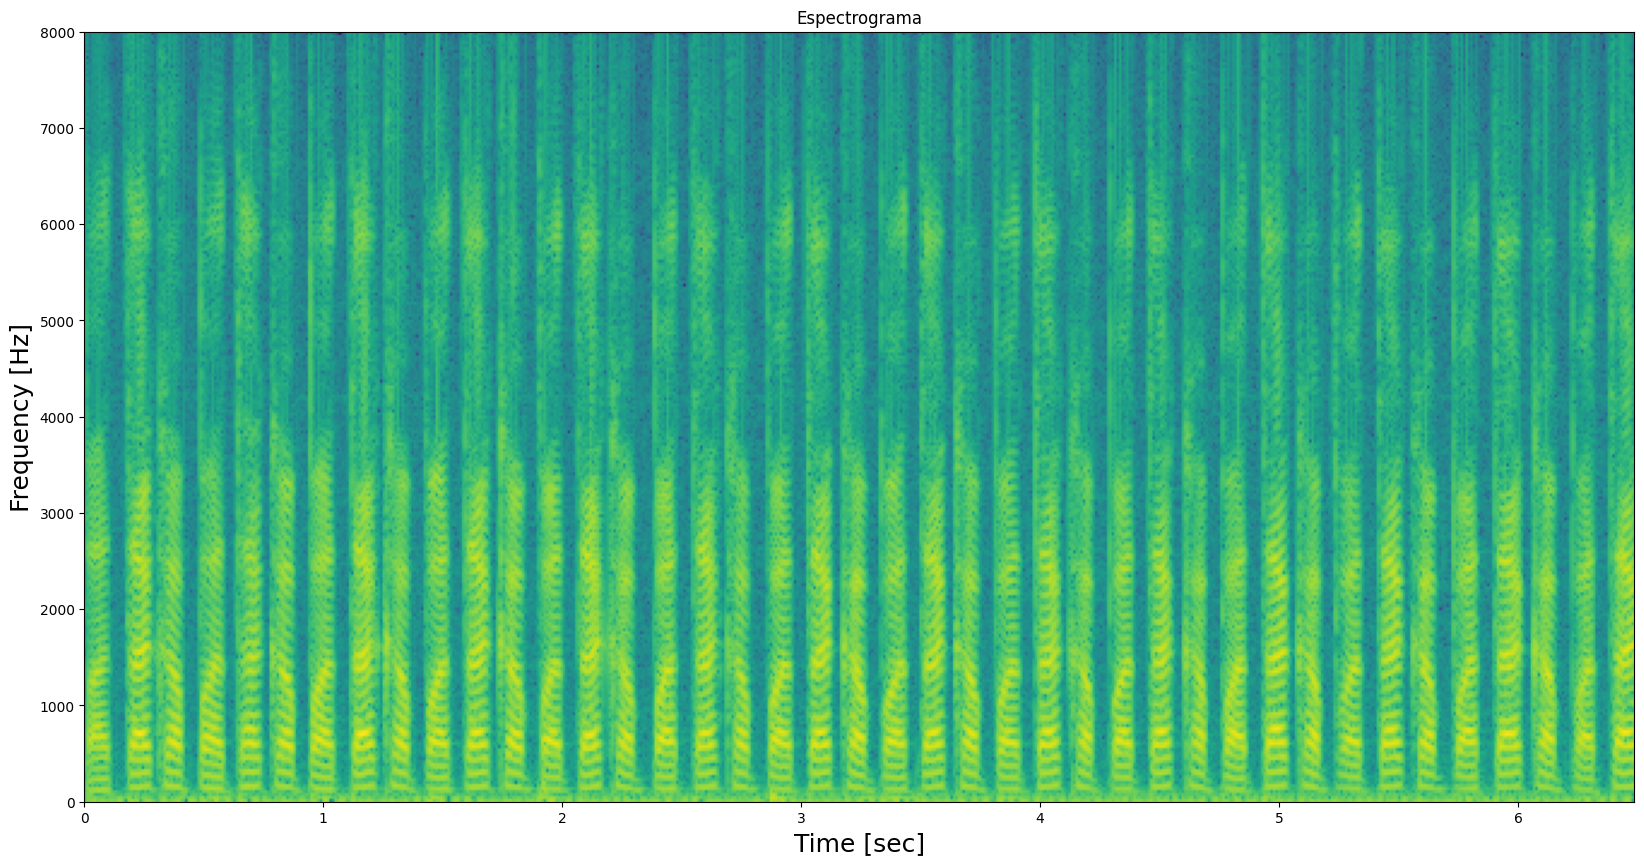

In [56]:
espectro,nfft=potspec(aplicacion_hamming,640,512)
espectro=np.flipud(10*np.log10(espectro).T)
plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.imshow(espectro,aspect='auto', extent=[0, len(x)/fs, 0, fs//2])
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

<p>Lo que se tiene con el espectrograma, al aplicar con los parametros indicados en la guia, permite ver en los puntos donde se tiene la tonalidad más fria (azul), bajos niveles de energía asociados a las frecuencias bajas, que en el audio, puede significar que la voz está mermando o incluso que sea ruido de fondo, en los tonos más calidos (amarillos), se ve como se tiene mayor acumulación de energia, que corresponde a las altas frecuencias en este caso, cuando se está hablando o algo parecido.</p>

<p>La frecuencia puede estar entre la cual se ven mejor los valores, corresponde a un rango entre 0 y 3khz, que es donde se puede ubicar la voz, además se ven en mayores frecuencias, valores que pueden corresponder a la acentuación de algunas vocales</p>

<h3>1.5.4</h3>

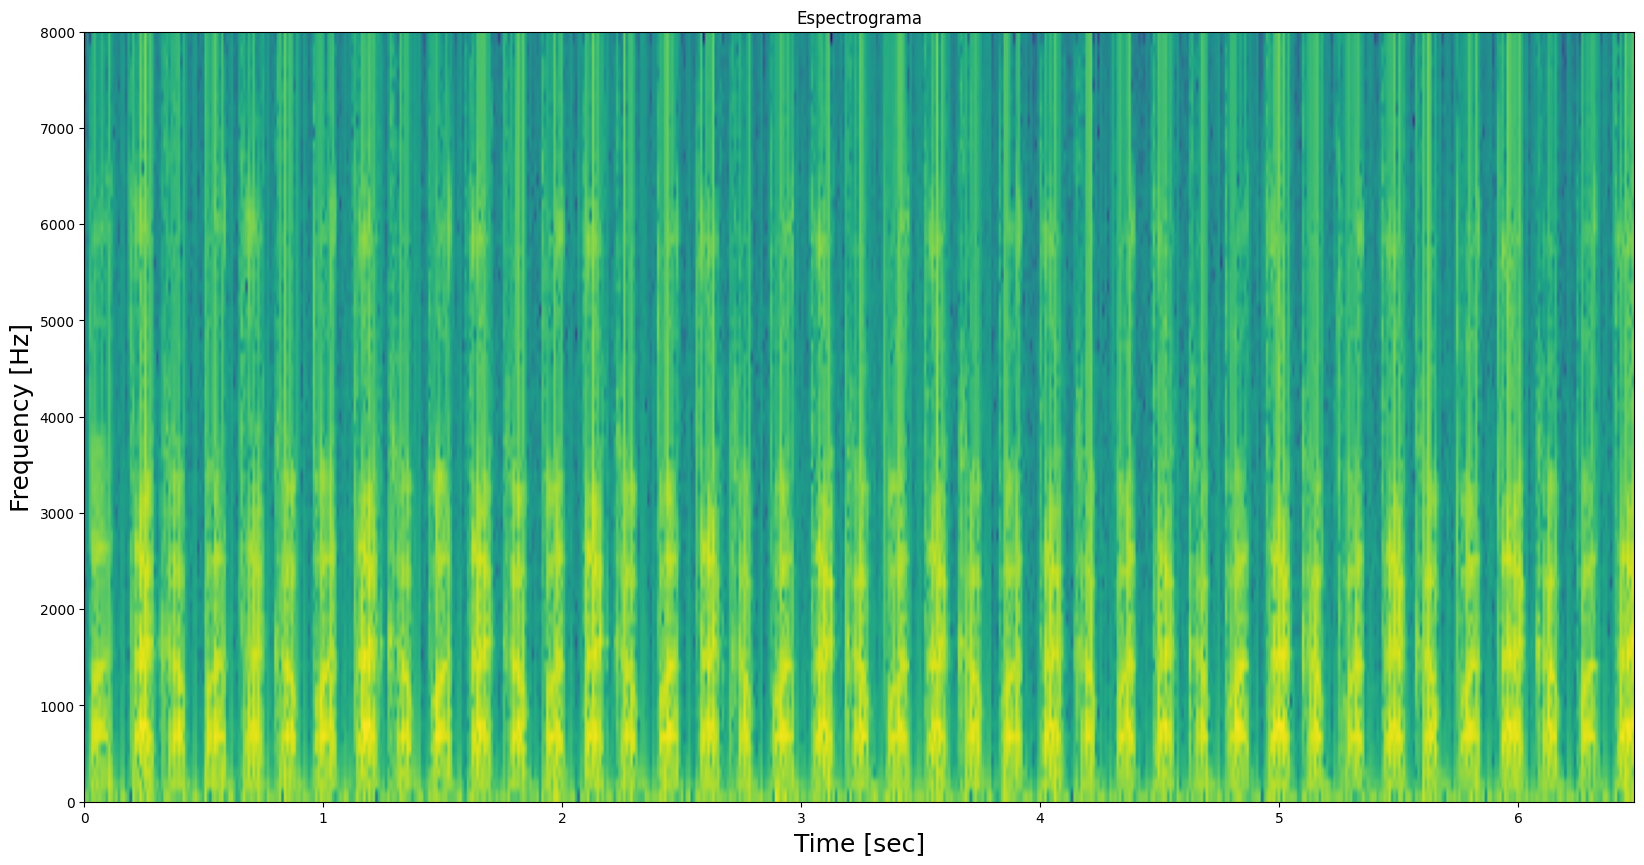

In [57]:
espectro,nfft=potspec(aplicacion_hamming,640,128)
espectro=np.flipud(10*np.log10(espectro).T)
plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.imshow(espectro,aspect='auto', extent=[0, len(x)/fs, 0, fs//2])
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

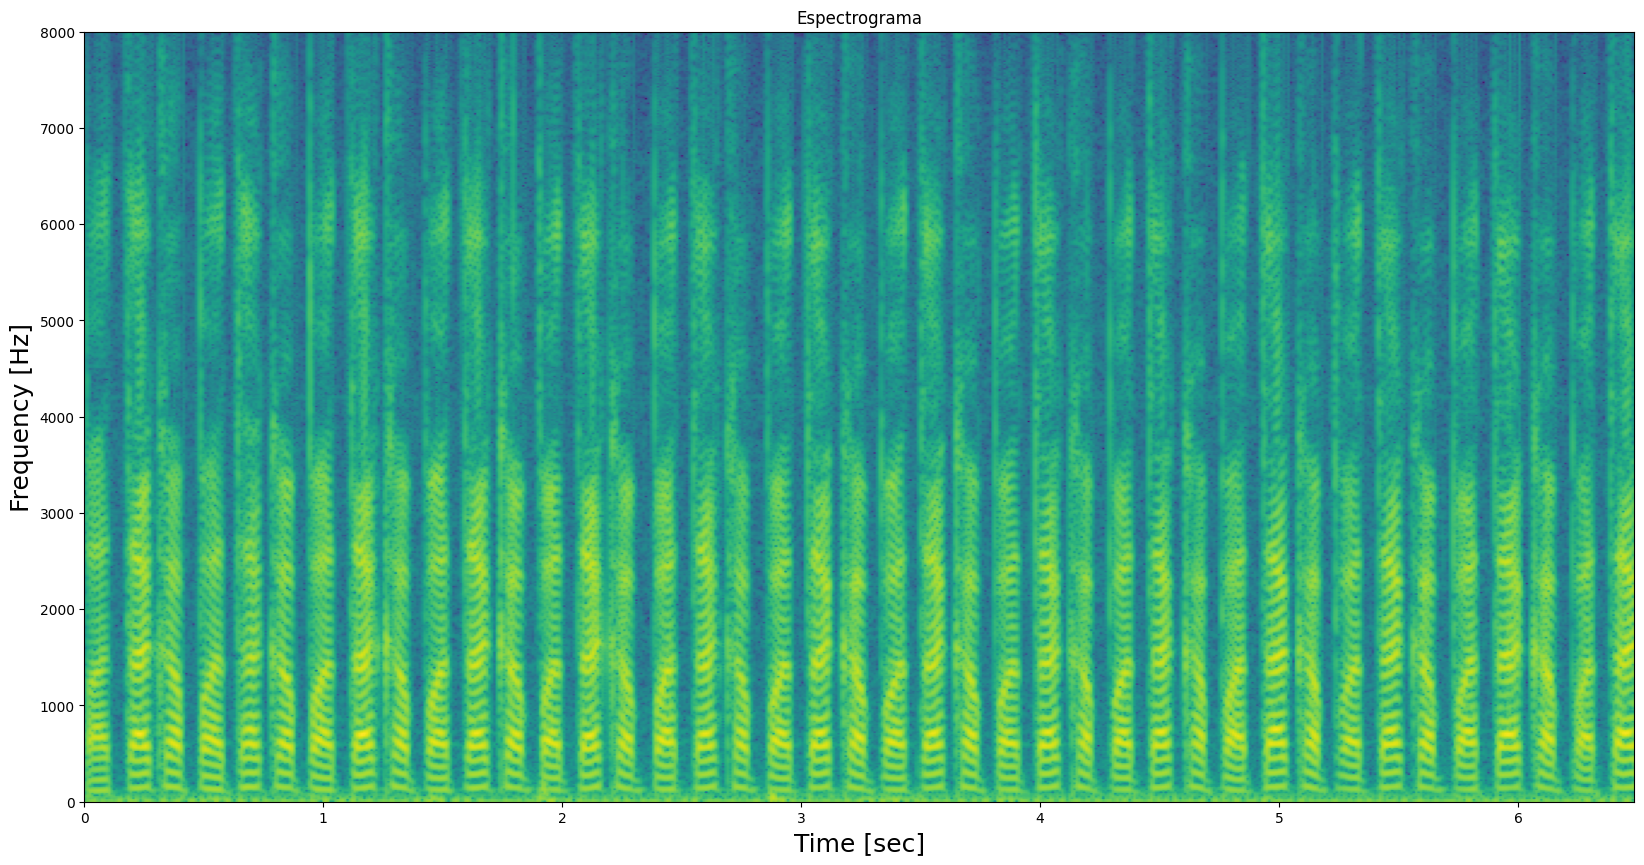

In [58]:
espectro,nfft=potspec(aplicacion_hamming,640,1024)
espectro=np.flipud(10*np.log10(espectro).T)
plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.imshow(espectro,aspect='auto', extent=[0, len(x)/fs, 0, fs//2])
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

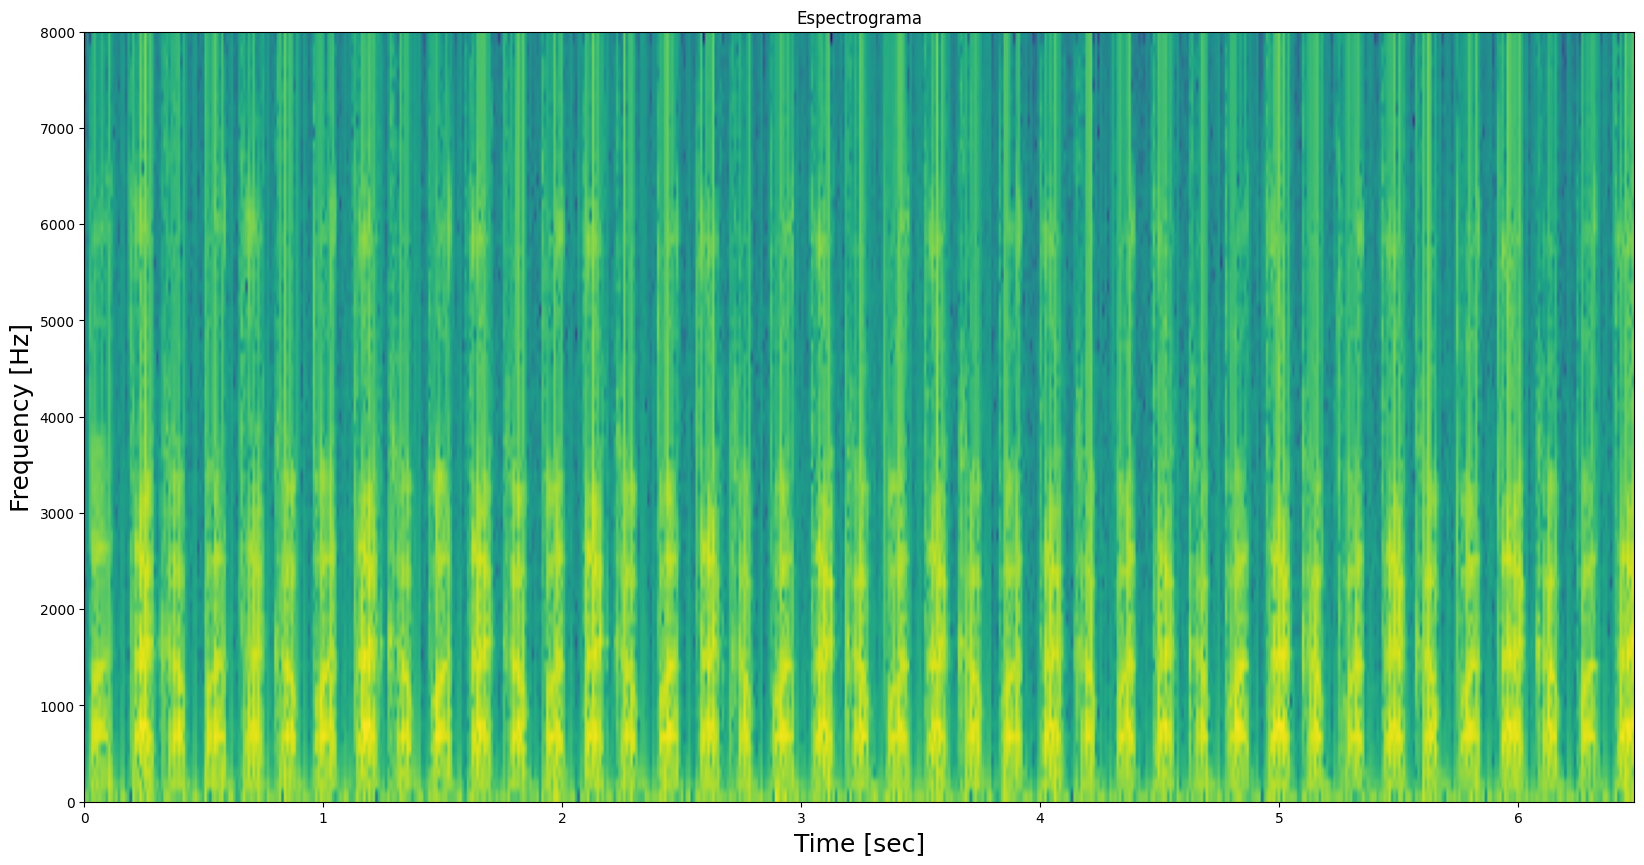

In [62]:
espectro,nfft=potspec(aplicacion_hamming,640,128)
espectro=np.flipud(10*np.log10(espectro).T)
plt.figure(figsize=(20,10))
plt.title('Espectrograma')
plt.imshow(espectro,aspect='auto', extent=[0, len(x)/fs, 0, fs//2])
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.show()

<p>Cuando se tiene un NFFT más pequeño, la resolución será peor, a medida que va aumentando la resolución es notoriamente mejor, sin embargo, se llega a un punto donde estas resoluciones se tornaran identicas en algun punto sin importar las variaciones, por lo cual se puede definir un valor en el cual no se requieran procesos computacionales extra, que generen una mayor carga al sistema, que en algunos casos son innecesarios.</p>

<h1>Conclusiones Generales</h1>
<p>
<li>Los espectrogramas en el analisis de audio, son importantes pues permiten analizar caracteristicas propias de la señal, por ejemplo en la identificación de notas musicales, identificar instrumentos, etc</li>
<li>Se puede usar en estudios de Electroencefalogramas los que tiene que ver con espectrogramas</li>
<li>El analisis y los cambios en el espectrograma, dependera del tipo de señal.</li>

</p>